In [1]:
'''
 * @Author: 11921006 Peixin Zhang 
 * @Date: 2019-05-27
'''

'\n * @Author: 11921006 Peixin Zhang \n * @Date: 2019-05-27\n'

In [2]:
import numpy as np
import numpy.matlib as ml
import random
import matplotlib.pyplot as plt

In [3]:
def calc_prob(k, pMiu, pSigma):
    Px = np.zeros([len(samples.T), k], dtype=float)
    for i in range(k):
        Xshift = np.mat(X - pMiu[i, :])
        inv_pSigma = np.mat(pSigma[:, :, i]).I
        coef = pow((2*np.pi), (len(X[0])/2)) * \
            np.sqrt(np.linalg.det(np.mat(pSigma[:, :, i])))
        for j in range(len(samples.T)):
            tmp = (Xshift[j, :] * inv_pSigma * Xshift[j, :].T)
            Px[j, i] = 1.0 / coef * np.exp(-0.5*tmp)
    return Px

In [4]:
def distmat(X, Y):
    n = len(X)
    m = len(Y)
    xx = ml.sum(X*X, axis=1)
    yy = ml.sum(Y*Y, axis=1)
    xy = ml.dot(X, Y.T)
    return np.tile(xx, (m, 1)).T + np.tile(yy, (n, 1)) - 2*xy

In [5]:
def init_params(centers, k):
    pMiu = centers
    pPi = np.zeros([1, k], dtype=float)
    pSigma = np.zeros([len(X[0]), len(X[0]), k], dtype=float)
    dist = distmat(X, centers)
    labels = dist.argmin(axis=1)
    for j in range(k):
        idx_j = (labels == j).nonzero()
        pMiu[j] = X[idx_j].mean(axis=0)
        pPi[0, j] = 1.0 * len(X[idx_j]) / len(samples.T)
        pSigma[:, :, j] = np.cov(np.mat(X[idx_j]).T)
    return pMiu, pPi, pSigma

In [6]:
mean = [0, 10]
cov = [[1, 0], [0, 100]]
k = 3
samples = np.random.multivariate_normal(mean, cov, 1000).T
X = samples.T

In [7]:
labels = np.zeros(len(X), dtype=int)

In [8]:
index = np.array(random.sample(list(range(len(X))), k))

In [9]:
centers = np.array(X[index])

In [10]:
Lprev = float(-10000)
pre_esp = 100000
threshold = 1e-6
maxiter = 100
pMiu, pPi, pSigma = init_params(centers, k)

iter 1 esp 4842.383571
iter 2 esp 25.303745
iter 3 esp 8.547145
iter 4 esp 4.186881
iter 5 esp 2.432360
iter 6 esp 1.561033
iter 7 esp 1.069550
iter 8 esp 0.767488
iter 9 esp 0.570023


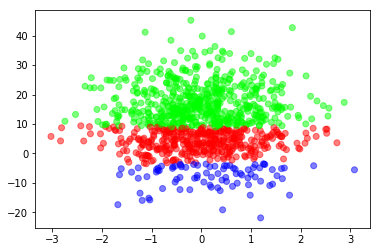

iter 10 esp 0.434795
iter 11 esp 0.338775
iter 12 esp 0.268592
iter 13 esp 0.216067
iter 14 esp 0.175975
iter 15 esp 0.144858
iter 16 esp 0.120361
iter 17 esp 0.100835
iter 18 esp 0.085101
iter 19 esp 0.072301


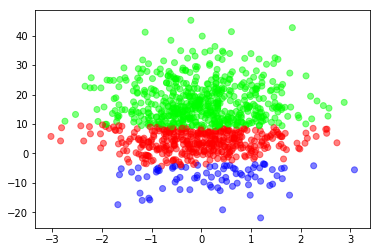

iter 20 esp 0.061798
iter 21 esp 0.053114
iter 22 esp 0.045883
iter 23 esp 0.039825
iter 24 esp 0.034719
iter 25 esp 0.030394
iter 26 esp 0.026712
iter 27 esp 0.023564
iter 28 esp 0.020860
iter 29 esp 0.018530


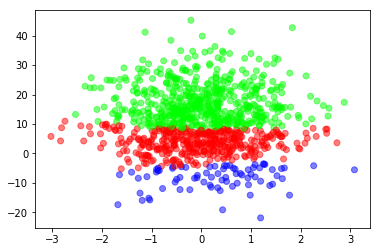

iter 30 esp 0.016513
iter 31 esp 0.014763
iter 32 esp 0.013239
iter 33 esp 0.011908
iter 34 esp 0.010742
iter 35 esp 0.009718
iter 36 esp 0.008817
iter 37 esp 0.008022
iter 38 esp 0.007318
iter 39 esp 0.006695


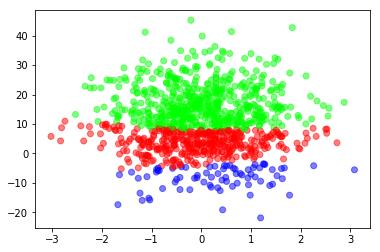

iter 40 esp 0.006142
iter 41 esp 0.005650
iter 42 esp 0.005211
iter 43 esp 0.004819
iter 44 esp 0.004469
iter 45 esp 0.004155
iter 46 esp 0.003874
iter 47 esp 0.003621
iter 48 esp 0.003394
iter 49 esp 0.003189


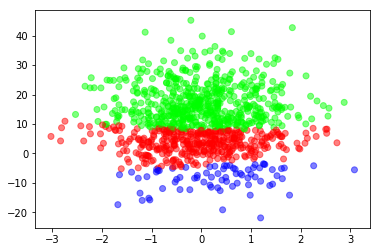

iter 50 esp 0.003005
iter 51 esp 0.002838
iter 52 esp 0.002688
iter 53 esp 0.002552
iter 54 esp 0.002429
iter 55 esp 0.002317
iter 56 esp 0.002216
iter 57 esp 0.002124
iter 58 esp 0.002041
iter 59 esp 0.001965


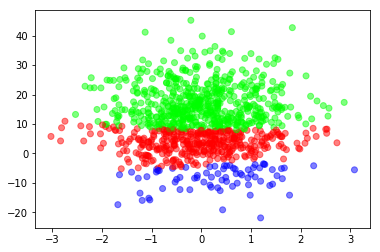

iter 60 esp 0.001896
iter 61 esp 0.001833
iter 62 esp 0.001776
iter 63 esp 0.001724
iter 64 esp 0.001677
iter 65 esp 0.001634
iter 66 esp 0.001595
iter 67 esp 0.001559
iter 68 esp 0.001527
iter 69 esp 0.001497


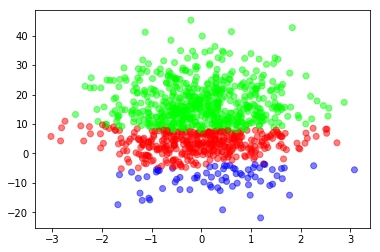

iter 70 esp 0.001470
iter 71 esp 0.001446
iter 72 esp 0.001423
iter 73 esp 0.001403
iter 74 esp 0.001385
iter 75 esp 0.001368
iter 76 esp 0.001353
iter 77 esp 0.001340
iter 78 esp 0.001328
iter 79 esp 0.001317


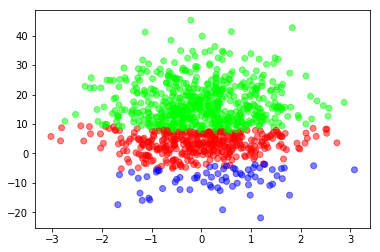

iter 80 esp 0.001308
iter 81 esp 0.001299
iter 82 esp 0.001292
iter 83 esp 0.001285
iter 84 esp 0.001279
iter 85 esp 0.001275
iter 86 esp 0.001270
iter 87 esp 0.001267
iter 88 esp 0.001265
iter 89 esp 0.001263


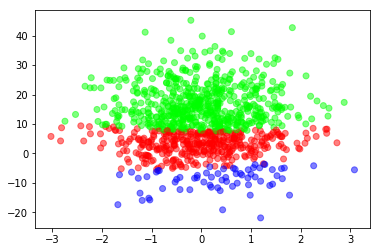

iter 90 esp 0.001261
iter 91 esp 0.001260
iter 92 esp 0.001260


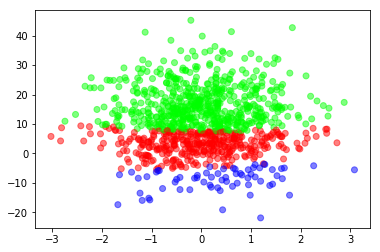

In [11]:
iter = 0
while iter < maxiter:
    Px = calc_prob(k, pMiu, pSigma)
    pGamma = np.mat(np.array(Px) * np.array(pPi))
    pGamma = pGamma / pGamma.sum(axis=1)
    Nk = pGamma.sum(axis=0)
    pMiu = np.diagflat(1/Nk) * pGamma.T * np.mat(X)
    pPi = Nk / len(samples.T)
    pSigma = np.zeros([len(X[0]), len(X[0]), k], dtype=float)
    for j in range(k):
        Xshift = np.mat(X) - pMiu[j, :]
        for i in range(len(samples.T)):
            pSigmaK = Xshift[i, :].T * Xshift[i, :]
            pSigmaK = pSigmaK * pGamma[i, j] / Nk[0, j]
            pSigma[:, :, j] = pSigma[:, :, j] + pSigmaK
    labels = pGamma.argmax(axis=1)
    if (iter+1) % 10 == 0:
        plt.clf()
        labels = np.array(labels).ravel()
        colors = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
        data_colors = [colors[lbl] for lbl in labels]
        plt.scatter(X[:, 0], X[:, 1], c=data_colors, alpha=0.5)
        plt.savefig('%d.png' % (iter+1))
        plt.show()
    iter = iter + 1
    L = sum(np.log(np.mat(Px) * np.mat(pPi).T))
    cur_esp = L-Lprev
    if cur_esp < threshold or cur_esp > pre_esp:
        plt.clf()
        labels = np.array(labels).ravel()
        colors = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
        data_colors = [colors[lbl] for lbl in labels]
        plt.scatter(X[:, 0], X[:, 1], c=data_colors, alpha=0.5)
        plt.savefig('%d.png' % (iter-1))
        plt.show()
        break
    pre_esp = cur_esp
    Lprev = L
    print("iter %d esp %lf" % (iter, cur_esp))